# Semantic Factors by Dispersion Index
This notebook aims for an exploratory factor analysis of "The Glasgow Norm" -- a database with 5.553 English words classified into nine psycholinguistics dimensions.  

This notebook makes use of the dataset prepared in previous analysis.

## Introduction

### Libraries

In [1]:
## Data analysis packages:
import pandas as pd
import numpy as np
from math import isnan  #Verifies if a given valu e is numerical.

In [2]:
## Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Plotly Express
import plotly.graph_objs as go
import plotly

### Definitions

In [4]:
## Forcing Pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_seq_items = 15000

## DataPrep

### Importing "The Glasgow Norms" dataset
Available at https://doi.org/10.3758/s13428-018-1099-3.  
The Glasgow Norms are a set of normative ratings for 5,553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

In [5]:
## Reading the dataset file:
## -> header=[0,1] parameters indicates that rows [0,1] must be considered as dataset header.
glasgow = pd.read_csv('../data/GlasgowR_pandas_ready.csv')

In [7]:
glasgow.head()

,words,length,AROU_M,AROU_SD,AROU_N,VAL_M,VAL_SD,VAL_N,DOM_M,DOM_SD,DOM_N,CNC_M,CNC_SD,CNC_N,IMAG_M,IMAG_SD,IMAG_N,FAM_M,FAM_SD,FAM_N,AOA_M,AOA_SD,AOA_N,SIZE_M,SIZE_SD,SIZE_N,GEND_M,GEND_SD,GEND_N
0,abattoir,8,4.200,2.400,25,2.864,1.740,22,4.333,1.285,21,5.455,1.900,22,4.391,2.121,23,2.382,1.799,34,6.760,0.427,25,4.652,1.549,23,5.391,1.170,23
1,abbey,5,3.125,2.342,32,5.781,1.268,32,4.667,1.551,33,5.906,1.508,32,5.344,1.881,32,3.324,1.810,34,5.177,1.339,34,5.121,1.629,33,3.303,1.193,33
2,abbreviate,10,3.273,1.582,33,5.250,1.031,32,5.235,1.238,34,3.286,1.733,35,3.177,1.689,34,5.121,1.838,33,5.543,1.130,35,2.667,1.700,33,3.971,0.954,34
3,abdicate,8,4.194,1.941,31,3.767,1.383,30,4.419,2.182,31,3.367,1.853,30,2.516,1.521,31,3.971,2.077,35,6.233,0.844,30,4.679,1.441,28,5.167,1.186,30
4,abdication,10,3.846,2.282,26,3.880,1.608,25,4.800,1.960,25,3.292,1.620,24,2.571,1.294,28,3.097,2.022,31,6.407,0.913,27,5.083,1.351,24,4.571,1.015,28


Setting the columns "words" as dataframe index:

In [8]:
glasgow.set_index('words', inplace=True)

----
### Segmenting the database into variables of interest

In [9]:
import re

In [10]:
## Listing only columns related to _M (mean) and _SD (standard deviation)
interest = ['AROU_M', 'AROU_SD',
                   'VAL_M', 'VAL_SD',
                   'DOM_M', 'DOM_SD',
                   'CNC_M', 'CNC_SD',
                   'IMAG_M', 'IMAG_SD',
                   'FAM_M', 'FAM_SD',
                   'AOA_M', 'AOA_SD',
                   'SIZE_M', 'SIZE_SD',
                   'GEND_M', 'GEND_SD']

### Selecting only columns related to _M (mean)

In [11]:
tmp_pattern_M = re.compile(r'.*_M$')
tmp_M_parameters = list(filter(tmp_pattern_M.match, interest))

print(tmp_M_parameters)

['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']


In [12]:
df_M = glasgow[tmp_M_parameters]
df_M

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571
...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452


----
### Selecting only columns related to _SD (standard deviation)

In [13]:
tmp_pattern_SD = re.compile(r'.*_SD$')
tmp_SD_parameters = list(filter(tmp_pattern_SD.match, interest))

print(tmp_SD_parameters)

['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_SD']


In [14]:
## Selecting a dataframe with SD values:
df_SD = glasgow[tmp_SD_parameters]
df_SD

,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,
abattoir,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015
...,...,...,...,...,...,...,...,...,...
zeppelin,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021
zero,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647
zest,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011


----
### Creating a dataframe with calculated variance (VAR)

In [15]:
## Creating a dataframe with variance values (variance = SD^2)
df_VAR = df_SD**2

In [16]:
## Using regular expression to replace the suffix in column names:
tmp_VAR_columns = [re.sub(r'_SD$', '_VAR', item) for item in list(df_VAR.columns)]
df_VAR.columns = tmp_VAR_columns
df_VAR

,AROU_VAR,VAL_VAR,DOM_VAR,CNC_VAR,IMAG_VAR,FAM_VAR,AOA_VAR,SIZE_VAR,GEND_VAR
words,,,,,,,,,
abattoir,5.760000,3.027600,1.651225,3.610000,4.498641,3.236401,0.182329,2.399401,1.368900
abbey,5.484964,1.607824,2.405601,2.274064,3.538161,3.276100,1.792921,2.653641,1.423249
abbreviate,2.502724,1.062961,1.532644,3.003289,2.852721,3.378244,1.276900,2.890000,0.910116
abdicate,3.767481,1.912689,4.761124,3.433609,2.313441,4.313929,0.712336,2.076481,1.406596
abdication,5.207524,2.585664,3.841600,2.624400,1.674436,4.088484,0.833569,1.825201,1.030225
...,...,...,...,...,...,...,...,...,...
zeppelin,4.149369,1.999396,3.038049,0.846400,1.261129,4.473225,0.891136,2.961841,1.042441
zero,4.092529,2.512225,4.511376,3.591025,5.508409,1.428025,1.261129,1.940449,0.418609
zest,4.656964,1.723969,1.742400,2.869636,2.630884,2.643876,1.261129,3.020644,1.022121


----
### Preparing a dataframe with means and variance of the nine psycholinguistic variables

In [17]:
## Combining df_M and df_VAR dataframes, i.e., means and variance.
df_M_VAR = pd.concat([df_M, df_VAR], axis=1)
df_M_VAR

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_VAR,VAL_VAR,DOM_VAR,CNC_VAR,IMAG_VAR,FAM_VAR,AOA_VAR,SIZE_VAR,GEND_VAR
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,5.760000,3.027600,1.651225,3.610000,4.498641,3.236401,0.182329,2.399401,1.368900
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,5.484964,1.607824,2.405601,2.274064,3.538161,3.276100,1.792921,2.653641,1.423249
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,2.502724,1.062961,1.532644,3.003289,2.852721,3.378244,1.276900,2.890000,0.910116
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,3.767481,1.912689,4.761124,3.433609,2.313441,4.313929,0.712336,2.076481,1.406596
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,5.207524,2.585664,3.841600,2.624400,1.674436,4.088484,0.833569,1.825201,1.030225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,4.149369,1.999396,3.038049,0.846400,1.261129,4.473225,0.891136,2.961841,1.042441
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,4.092529,2.512225,4.511376,3.591025,5.508409,1.428025,1.261129,1.940449,0.418609
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,4.656964,1.723969,1.742400,2.869636,2.630884,2.643876,1.261129,3.020644,1.022121


### Preparing a dataframe with Mean, SD

In [18]:
## Combining mean, standard deviation, and variance:
df_M_SD = pd.concat([df_M, df_SD], axis=1)
df_M_SD

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011


----
## Correlation Analysis of the mean of psycholinguistics dimensions

<Axes: >

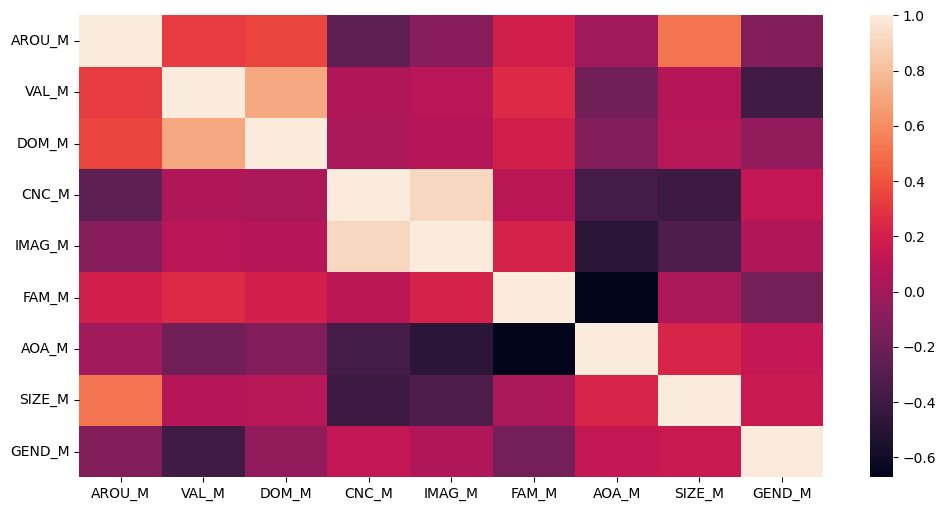

In [19]:
## Plotting the correlation map only for Mean values
plt.figure(figsize=(12,6))
c= df_M.corr()
sns.heatmap(c)

-----
### Visualizing features with confidence interval:

In [20]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf


def viz_GlasgowR(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

In [21]:
glasgow.loc['gun']

length      3.000
AROU_M      5.571
AROU_SD     2.739
AROU_N     35.000
VAL_M       2.800
VAL_SD      2.135
VAL_N      35.000
DOM_M       5.147
DOM_SD      2.992
DOM_N      34.000
CNC_M       6.441
CNC_SD      1.090
CNC_N      34.000
IMAG_M      6.686
IMAG_SD     0.785
IMAG_N     35.000
FAM_M       6.429
FAM_SD      0.871
FAM_N      35.000
AOA_M       2.857
AOA_SD      1.199
AOA_N      35.000
SIZE_M      3.647
SIZE_SD     1.998
SIZE_N     34.000
GEND_M      6.057
GEND_SD     0.826
GEND_N     35.000
Name: gun, dtype: float64

In [22]:
viz_GlasgowR(words=['woman'], dataframe=glasgow)

In [29]:
viz_GlasgowR(words=['dog', 'dream'], dataframe=glasgow)

> Experimenting some words visualization:

In [30]:
fig_dog = viz_GlasgowR(['elephant','worm'], glasgow)
fig_dog

> EBNS suggested the words "snake" e "dog".  
> How does it compare to known symbols, i.e., words whose relationships are already known?

In [31]:
## Showing the interest attributes for the words SNAKE and DOG:
glasgow.loc[['snake', 'dog'],interest]

,AROU_M,AROU_SD,VAL_M,VAL_SD,DOM_M,DOM_SD,CNC_M,CNC_SD,IMAG_M,IMAG_SD,FAM_M,FAM_SD,AOA_M,AOA_SD,SIZE_M,SIZE_SD,GEND_M,GEND_SD
words,,,,,,,,,,,,,,,,,,
snake,4.909,2.366,3.657,1.620,5.257,2.047,6.714,0.700,6.657,0.630,5.647,1.473,2.529,0.947,3.091,1.621,5.200,1.064
dog,6.147,2.185,7.067,1.237,6.242,1.793,6.833,0.453,6.889,0.314,6.840,0.463,1.735,0.656,3.273,1.238,4.606,0.983


In [33]:
viz_GlasgowR(['snake','dog'], glasgow)

In [ ]:
glasgow.loc['jigsaw']

length      6.000
AROU_M      3.323
AROU_SD     1.941
AROU_N     31.000
VAL_M       5.548
VAL_SD      1.187
VAL_N      31.000
DOM_M       5.563
DOM_SD      1.540
DOM_N      32.000
CNC_M       6.219
CNC_SD      1.111
CNC_N      32.000
IMAG_M      6.438
IMAG_SD     0.899
IMAG_N     32.000
FAM_M       5.710
FAM_SD      1.689
FAM_N      31.000
AOA_M       2.576
AOA_SD      1.393
AOA_N      33.000
SIZE_M      2.323
SIZE_SD     1.254
SIZE_N     31.000
GEND_M      3.909
GEND_SD     0.793
GEND_N     33.000
Name: jigsaw, dtype: float64

In [128]:
viz_GlasgowR(['snake','dog','evil'], glasgow)

In [34]:
viz_GlasgowR(['child','baby','human'], glasgow)

----
# Index of Dispersion (or Variance-to-mean Ratio)
As discussed with Dr. Miguel Ribeiro, it is not appropriate to use mean and variance as input variables of a factor analysis. However, considering the theoretical hypothesis of this work, variance does impact the interpretation and should be considered, i.e., CNC_M value indicates the average concreteness attributed to a word, but a lower variance may indicate it is more objective than subjective.  

In this chapter, we will create a new indicator -- the variance coefficient -- as the ratio between standard deviation and mean:  
${DI} = \frac{\sigma^2}{\mu}*100$  

> In fact, it is also called "index of dispersion", or Fano index: https://en.wikipedia.org/wiki/Index_of_dispersion 

In [23]:
df_M.head(2)

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M
words,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303


In [24]:
df_SD.head(2)

,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD
words,,,,,,,,,
abattoir,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170
abbey,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193


In [25]:
## Checking if indexes in both dataframes are identical:
print(f'Indexes are equals in both dataframes: {df_M.index.equals(df_SD.index)}')

Indexes are equals in both dataframes: True


In [26]:
## Checking if columns stem are equivalent in both dataframes:
re_stem = r'(.+?)_'
stems_df_M = [re.match(re_stem, col).group(1) for col in df_M.columns]
stems_df_SD = [re.match(re_stem, col).group(1) for col in df_SD.columns]
print(f'The stem of each column name is identical: {set(stems_df_M) == set(stems_df_SD)}')

The stem of each column name is identical: True


### Calculating the Dispersion Index:

In [27]:
df_DI = (np.square(df_SD.values) / df_M.values)
df_DI = pd.DataFrame(df_DI, columns=[dim + '_DI' for dim in stems_df_M], index=df_M.index)

In [28]:
df_DI

,AROU_DI,VAL_DI,DOM_DI,CNC_DI,IMAG_DI,FAM_DI,AOA_DI,SIZE_DI,GEND_DI
words,,,,,,,,,
abattoir,1.371429,1.057123,0.381081,0.661778,1.024514,1.358691,0.026972,0.515778,0.253923
abbey,1.755188,0.278122,0.515449,0.385043,0.662081,0.985590,0.346324,0.518188,0.430896
abbreviate,0.764658,0.202469,0.292769,0.913965,0.897929,0.659684,0.230363,1.083615,0.229191
abdicate,0.898303,0.507749,1.077421,1.019783,0.919492,1.086358,0.114285,0.443787,0.272227
abdication,1.354010,0.666408,0.800333,0.797205,0.651278,1.320143,0.130103,0.359079,0.225383
...,...,...,...,...,...,...,...,...,...
zeppelin,0.670876,0.399879,0.569670,0.134648,0.203901,1.412449,0.147637,0.542065,0.197844
zero,1.015264,0.600723,0.987820,1.335947,1.411327,0.227792,0.478425,1.103782,0.100338
zest,0.780192,0.252856,0.284659,0.646606,0.652339,0.660969,0.235110,1.145920,0.296095


### Calculating the Signal-to-Noise Rate:

In [55]:
df_SNR = (df_M.values / df_SD.values)
df_SNR = pd.DataFrame(df_SNR, columns=[dim + '_SNR' for dim in stems_df_M], index=df_M.index)

C:\Users\tiago\AppData\Local\Temp\ipykernel_22680\1839602371.py:1: RuntimeWarning:

divide by zero encountered in divide



In [57]:
df_SNR

,AROU_SNR,VAL_SNR,DOM_SNR,CNC_SNR,IMAG_SNR,FAM_SNR,AOA_SNR,SIZE_SNR,GEND_SNR
words,,,,,,,,,
abattoir,1.750000,1.645977,3.371984,2.871053,2.070250,1.324069,15.831382,3.003228,4.607692
abbey,1.334330,4.559148,3.009026,3.916446,2.841042,1.836464,3.866318,3.143646,2.768650
abbreviate,2.068900,5.092144,4.228595,1.896134,1.880995,2.786181,4.905310,1.568824,4.162474
abdicate,2.160742,2.723789,2.025206,1.817053,1.654175,1.911892,7.385071,3.247051,4.356661
abdication,1.685364,2.412935,2.448980,2.032099,1.986862,1.531652,7.017525,3.762398,4.503448
...,...,...,...,...,...,...,...,...,...
zeppelin,3.036328,3.536068,3.059667,6.832609,5.507569,1.497400,6.394068,3.174898,5.160627
zero,1.992585,2.638486,2.150188,1.418470,1.662974,5.246025,2.347284,1.262024,6.448223
zest,2.765987,5.192688,4.637121,2.619835,2.486436,2.460025,4.776492,1.516686,3.414441


### Preparing a full dataframe with Mean, SD, and DI

In [58]:
## Combining mean, standard deviation, and variance:
df = pd.concat([df_M, df_SD, df_DI, df_SNR], axis=1)
df

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_SD,VAL_SD,DOM_SD,CNC_SD,IMAG_SD,FAM_SD,AOA_SD,SIZE_SD,GEND_SD,AROU_DI,VAL_DI,DOM_DI,CNC_DI,IMAG_DI,FAM_DI,AOA_DI,SIZE_DI,GEND_DI,AROU_SNR,VAL_SNR,DOM_SNR,CNC_SNR,IMAG_SNR,FAM_SNR,AOA_SNR,SIZE_SNR,GEND_SNR
words,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,2.400,1.740,1.285,1.900,2.121,1.799,0.427,1.549,1.170,1.371429,1.057123,0.381081,0.661778,1.024514,1.358691,0.026972,0.515778,0.253923,1.750000,1.645977,3.371984,2.871053,2.070250,1.324069,15.831382,3.003228,4.607692
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,2.342,1.268,1.551,1.508,1.881,1.810,1.339,1.629,1.193,1.755188,0.278122,0.515449,0.385043,0.662081,0.985590,0.346324,0.518188,0.430896,1.334330,4.559148,3.009026,3.916446,2.841042,1.836464,3.866318,3.143646,2.768650
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,1.582,1.031,1.238,1.733,1.689,1.838,1.130,1.700,0.954,0.764658,0.202469,0.292769,0.913965,0.897929,0.659684,0.230363,1.083615,0.229191,2.068900,5.092144,4.228595,1.896134,1.880995,2.786181,4.905310,1.568824,4.162474
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,1.941,1.383,2.182,1.853,1.521,2.077,0.844,1.441,1.186,0.898303,0.507749,1.077421,1.019783,0.919492,1.086358,0.114285,0.443787,0.272227,2.160742,2.723789,2.025206,1.817053,1.654175,1.911892,7.385071,3.247051,4.356661
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,2.282,1.608,1.960,1.620,1.294,2.022,0.913,1.351,1.015,1.354010,0.666408,0.800333,0.797205,0.651278,1.320143,0.130103,0.359079,0.225383,1.685364,2.412935,2.448980,2.032099,1.986862,1.531652,7.017525,3.762398,4.503448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeppelin,6.185,5.000,5.333,6.286,6.185,3.167,6.036,5.464,5.269,2.037,1.414,1.743,0.920,1.123,2.115,0.944,1.721,1.021,0.670876,0.399879,0.569670,0.134648,0.203901,1.412449,0.147637,0.542065,0.197844,3.036328,3.536068,3.059667,6.832609,5.507569,1.497400,6.394068,3.174898,5.160627
zero,4.031,4.182,4.567,2.688,3.903,6.269,2.636,1.758,4.172,2.023,1.585,2.124,1.895,2.347,1.195,1.123,1.393,0.647,1.015264,0.600723,0.987820,1.335947,1.411327,0.227792,0.478425,1.103782,0.100338,1.992585,2.638486,2.150188,1.418470,1.662974,5.246025,2.347284,1.262024,6.448223
zest,5.969,6.818,6.121,4.438,4.033,4.000,5.364,2.636,3.452,2.158,1.313,1.320,1.694,1.622,1.626,1.123,1.738,1.011,0.780192,0.252856,0.284659,0.646606,0.652339,0.660969,0.235110,1.145920,0.296095,2.765987,5.192688,4.637121,2.619835,2.486436,2.460025,4.776492,1.516686,3.414441


## Visualizing Dispersion Index

In [ ]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf


def viz_Glasgow_DI(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    label_DI = ['AROU_DI', 'VAL_DI', 'DOM_DI', 'CNC_DI', 'IMAG_DI', 'FAM_DI', 'AOA_DI', 'SIZE_DI', 'GEND_DI']
    
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            feat_DI = list(dataframe.loc[word][label_DI])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]
            

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
            
            fig.add_trace(go.Scatter(
                x=x,
                y=feat_DI,
                mode='markers',  # Adiciona bolinha com texto
                # text=[f"{feat_VC:.1f}"],
                textposition='top center',  # Posição do texto
                marker=dict(
                    color=color,  # Cor igual ao gráfico de linhas
                    size=10  # Tamanho da bolinha
                ),
                name=f'{word} (DI)',
                showlegend=True
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

In [ ]:
viz_Glasgow_DI(['child','sadness'], df)

----
# Factor Analysis (based on the **DI** and **SNR**)
Based on the https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42.
> It is not a detailed tutorial.    

This tutorial brings more reference on factor analysis calculation: https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729

In [ ]:
from factor_analyzer import FactorAnalyzer

In [64]:
label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
label_DI = ['AROU_DI', 'VAL_DI', 'DOM_DI', 'CNC_DI', 'IMAG_DI', 'FAM_DI', 'AOA_DI', 'SIZE_DI', 'GEND_DI']
label_SNR = ['AROU_SNR', 'VAL_SNR', 'DOM_SNR', 'CNC_SNR', 'IMAG_SNR', 'FAM_SNR', 'AOA_SNR', 'SIZE_SNR', 'GEND_SNR']

In [100]:
data = df[label_M + label_DI]

In [102]:
data.head()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_DI,VAL_DI,DOM_DI,CNC_DI,IMAG_DI,FAM_DI,AOA_DI,SIZE_DI,GEND_DI
words,,,,,,,,,,,,,,,,,,
abattoir,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,1.371429,1.057123,0.381081,0.661778,1.024514,1.358691,0.026972,0.515778,0.253923
abbey,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,1.755188,0.278122,0.515449,0.385043,0.662081,0.985590,0.346324,0.518188,0.430896
abbreviate,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0.764658,0.202469,0.292769,0.913965,0.897929,0.659684,0.230363,1.083615,0.229191
abdicate,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0.898303,0.507749,1.077421,1.019783,0.919492,1.086358,0.114285,0.443787,0.272227
abdication,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,1.354010,0.666408,0.800333,0.797205,0.651278,1.320143,0.130103,0.359079,0.225383


In [ ]:
## Selecting a subset of the original dataframe with only the columns of interest:
# x = glasgow[interest]

In [103]:
data.describe()

,AROU_M,VAL_M,DOM_M,CNC_M,IMAG_M,FAM_M,AOA_M,SIZE_M,GEND_M,AROU_DI,VAL_DI,DOM_DI,CNC_DI,IMAG_DI,FAM_DI,AOA_DI,SIZE_DI,GEND_DI
count,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000
mean,4.627180,5.095874,5.065290,4.642565,4.787397,5.256607,4.134724,4.087411,4.123718,0.942817,0.360926,0.667105,0.504907,0.545078,0.486588,0.357862,0.503028,0.287289
std,1.095891,1.545788,0.909191,1.416407,1.348282,0.926752,1.242402,1.021217,0.910877,0.292633,0.231014,0.362842,0.300892,0.335503,0.300902,0.145346,0.210806,0.151934
min,2.057000,1.030000,1.941000,1.636000,1.737000,1.647000,1.219000,1.364000,1.000000,0.104186,0.005610,0.041281,0.007752,0.007956,0.008232,0.004001,0.020129,0.000000
25%,3.774000,4.188000,4.576000,3.343000,3.606000,4.677000,3.118000,3.387000,3.625000,0.761031,0.201901,0.405194,0.245284,0.231887,0.249408,0.257357,0.354800,0.179526
50%,4.515000,5.286000,5.147000,4.636000,4.788000,5.406000,4.171000,4.125000,4.143000,0.933640,0.300834,0.577950,0.508445,0.567871,0.432352,0.340693,0.471643,0.252625
75%,5.364000,6.059000,5.606000,6.029000,6.091000,5.969000,5.133000,4.829000,4.686000,1.117232,0.462198,0.839808,0.718240,0.805400,0.667564,0.433016,0.616016,0.361241
max,8.177000,8.647000,8.371000,6.943000,6.941000,6.939000,6.971000,6.912000,6.971000,2.334472,1.906269,2.498373,1.663423,1.674243,1.704739,1.428653,2.037331,1.432162


In [87]:
## Finding the two largest values in 'GEND_SNR' column:
data['GEND_SNR'].nlargest(2)

words
lady          inf
man     41.742515
Name: GEND_SNR, dtype: float64

In [88]:
## Replacing '+inf' to twice the second largest value:
data.replace(np.inf, 2*data['GEND_SNR'].nlargest(2)[1], inplace=True)

C:\Users\tiago\AppData\Local\Temp\ipykernel_22680\1912353016.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [90]:
## Checking if the previous step has worked:
data['GEND_SNR'].nlargest(2)

words
lady    83.485030
man     41.742515
Name: GEND_SNR, dtype: float64

In [104]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()

## fa.fit(df_M)
fa.fit(data)


FactorAnalyzer(rotation_kwargs={})

In [105]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([4.64162511, 3.50397917, 2.16054106, 1.5853128 , 1.42931767,
       0.86708983, 0.77570398, 0.70450461, 0.46086334, 0.38012714,
       0.3047882 , 0.27836968, 0.25445277, 0.22397941, 0.16360035,
       0.15321798, 0.06469037, 0.04783654])

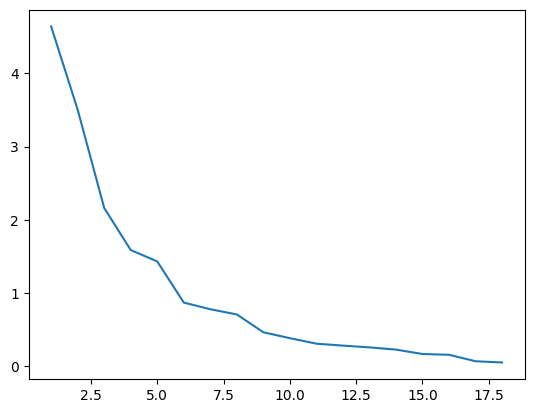

In [106]:
plt.plot(range(1,data.shape[1]+1),ev)

> Fatores com auto-valor <= 1 é um fator não mais informativo do que uma única variável. Traz igual ou menos informação do que uma variável sozinha.

### Choosing two factors and analyzing their structure:

> Choosing 2 factors (> than 2).
>> Although I would like to have just 2 -> objective and subjective.

In [107]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(data)
loads = fa.loadings_
print(loads)

[[ 0.41789204 -0.28380761  0.23477126]
 [ 0.00851639 -0.89705744  0.1424577 ]
 [ 0.02014081 -0.7286361   0.09837659]
 [-0.91335495 -0.00430737  0.13287477]
 [-0.82720744 -0.02939518  0.28812831]
 [ 0.01297227 -0.1294697   0.94650549]
 [ 0.36108448  0.12250172 -0.70260131]
 [ 0.58571907  0.01600593  0.08735566]
 [-0.07155429  0.34294463 -0.1179528 ]
 [-0.21913178  0.53362992 -0.12730599]
 [ 0.21084554  0.60932729 -0.02834852]
 [ 0.33094486  0.61216525  0.12285438]
 [ 0.82403038  0.0292931  -0.07937584]
 [ 0.78274436  0.07547119 -0.2743785 ]
 [-0.09140876  0.16274001 -0.85794614]
 [-0.25337955 -0.02184388  0.28043685]
 [-0.46543783  0.12357526 -0.04334478]
 [ 0.15170195 -0.19673517  0.01153646]]


### Analyzing the factor structure:

In [108]:
def highlight_high_values(val, th=0.5):
    ''' Highlights values higher or lower than 0.5. Must be applied as a map in a Pandas.DataFrame style.
    '''
    # color = 'background-color: yellow' if ((val > th) or (val < -th)) else ''
    if (val > th):
        color = 'background-color: yellow' 
    elif (val < -th):
        color = 'background-color: red'
    else:
        color = ''
    return color

In [109]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2','Factor 3'], index=[data.columns])

In [110]:
factors.style.applymap(highlight_high_values, th=0.4)

C:\Users\tiago\AppData\Local\Temp\ipykernel_22680\1062230875.py:1: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Factor 1,Factor 2,Factor 3
AROU_M,0.417892,-0.283808,0.234771
VAL_M,0.008516,-0.897057,0.142458
DOM_M,0.020141,-0.728636,0.098377
CNC_M,-0.913355,-0.004307,0.132875
IMAG_M,-0.827207,-0.029395,0.288128
FAM_M,0.012972,-0.129470,0.946505
AOA_M,0.361084,0.122502,-0.702601
SIZE_M,0.585719,0.016006,0.087356
GEND_M,-0.071554,0.342945,-0.117953
AROU_DI,-0.219132,0.533630,-0.127306


### Discussion regarding Factor Analysis:
- As expected to, it seems **Factor 1** may relate to objectivity:  
    > It is strongly related to concreteness; and  
    > It is strongly related to imageability, i.e., how ones can easily imagine or picture a given concept.

- **Factor 2**, on the other hand, seems to relate to subjectivity, strongly influenced by valence, dominance and partially related to arousal.  

- A third factor emerges from these data, **Factor 3**, mostly related to familiarity. This factor can be theoretically associated to context.

In [ ]:
factors_name = ['F_Objectivity','F_Subjectivity','F_Context']

### Calculating Factor Variance:

In [ ]:
variance_metrics = fa.get_factor_variance()

# A Soma dos Quadrados dos Loadings estará na terceira coluna (índice 2)
sum_squared_loadings = variance_metrics[2]

print("Sum of Squared Loadings por fator:", sum_squared_loadings)

Sum of Squared Loadings por fator: [0.18781336 0.3461755  0.42429536]


In [ ]:
pd.DataFrame(variance_metrics, columns=factors_name, index=['SumSquared Loadings','Proportional Var','Cumulative Var'])

,F_Objectivity,F_Subjectivity,F_Context
SumSquared Loadings,1.690320,1.425259,0.703079
Proportional Var,0.187813,0.158362,0.078120
Cumulative Var,0.187813,0.346175,0.424295


> The "Cumulative Variance" above indicates that 58% of the variance of the data is explained by these three factors.

### Criação das variáveis latentes:

In [ ]:
scores = pd.DataFrame(fa.transform(df_M), columns=factors_name, index=df_M.index)

In [ ]:
scores

,F_Objectivity,F_Subjectivity,F_Context
words,,,
abattoir,0.932546,-1.094743,-2.723893
abbey,1.215183,0.128420,-1.653890
abbreviate,-0.875451,-0.025715,-0.619482
abdicate,-0.620040,-0.675388,-1.516463
abdication,-0.559100,-0.684211,-2.008800
...,...,...,...
zeppelin,1.091176,0.474037,-2.083340
zero,-1.588099,-0.736184,1.613288
zest,0.173272,1.201733,-1.378757


In [ ]:
fa.get_communalities()

array([0.31634418, 0.86878409, 0.54837827, 0.99867841, 0.75162789,
       0.68912676, 0.77227183, 0.24719008, 0.08931239])

In [ ]:
scores.describe()

,F_Objectivity,F_Subjectivity,F_Context
count,5.553000e+03,5.553000e+03,5.553000e+03
mean,-3.480418e-16,-1.036448e-16,2.111283e-16
std,1.020413e+00,9.506500e-01,9.100249e-01
min,-2.459348e+00,-2.408166e+00,-3.113331e+00
25%,-8.777826e-01,-5.680641e-01,-6.160451e-01
50%,8.048454e-03,3.275790e-02,5.091560e-02
75%,9.524171e-01,5.902665e-01,6.782075e-01
max,1.987073e+00,2.602231e+00,2.316282e+00


In [ ]:
## Exemplifying with a trial word:
scores.loc['dog']

F_Objectivity     1.425720
F_Subjectivity    1.348524
F_Context         1.427143
Name: dog, dtype: float64

----
# Factor Analysis (based on the **dispersion index**)
Based on the https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42.
> It is not a detailed tutorial.    

This tutorial brings more reference on factor analysis calculation: https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729

In [33]:
from factor_analyzer import FactorAnalyzer

In [35]:
label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
label_DI = ['AROU_DI', 'VAL_DI', 'DOM_DI', 'CNC_DI', 'IMAG_DI', 'FAM_DI', 'AOA_DI', 'SIZE_DI', 'GEND_DI']

In [36]:
df_DI

,AROU_DI,VAL_DI,DOM_DI,CNC_DI,IMAG_DI,FAM_DI,AOA_DI,SIZE_DI,GEND_DI
words,,,,,,,,,
abattoir,1.371429,1.057123,0.381081,0.661778,1.024514,1.358691,0.026972,0.515778,0.253923
abbey,1.755188,0.278122,0.515449,0.385043,0.662081,0.985590,0.346324,0.518188,0.430896
abbreviate,0.764658,0.202469,0.292769,0.913965,0.897929,0.659684,0.230363,1.083615,0.229191
abdicate,0.898303,0.507749,1.077421,1.019783,0.919492,1.086358,0.114285,0.443787,0.272227
abdication,1.354010,0.666408,0.800333,0.797205,0.651278,1.320143,0.130103,0.359079,0.225383
...,...,...,...,...,...,...,...,...,...
zeppelin,0.670876,0.399879,0.569670,0.134648,0.203901,1.412449,0.147637,0.542065,0.197844
zero,1.015264,0.600723,0.987820,1.335947,1.411327,0.227792,0.478425,1.103782,0.100338
zest,0.780192,0.252856,0.284659,0.646606,0.652339,0.660969,0.235110,1.145920,0.296095


In [46]:
## Selecting a subset of the original dataframe with only the columns of interest:
# x = glasgow[interest]

In [111]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()

## fa.fit(df_M)
fa.fit(df_DI)


FactorAnalyzer(rotation_kwargs={})

In [112]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([2.28901233, 1.70737738, 1.1391583 , 0.99729371, 0.9043239 ,
       0.7338093 , 0.62168185, 0.39378666, 0.21355657])

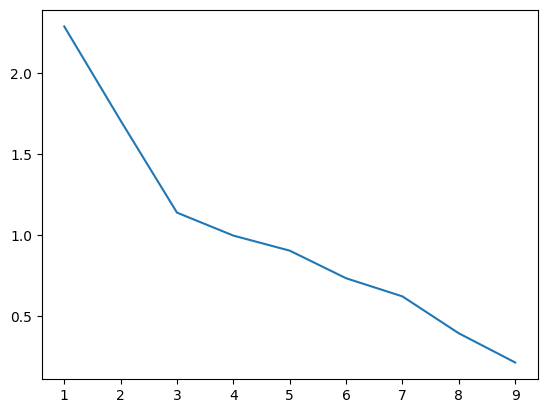

In [113]:
plt.plot(range(1,df_DI.shape[1]+1),ev)

> Fatores com auto-valor <= 1 é um fator não mais informativo do que uma única variável. Traz igual ou menos informação do que uma variável sozinha.

### Choosing two factors and analyzing their structure:

> Choosing 2 factors (> than 2).
>> Although I would like to have just 2 -> objective and subjective.

In [114]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(df_DI)
loads = fa.loadings_
print(loads)

[[-0.05181238  0.29849713  0.5603533 ]
 [ 0.13445567  0.5969895   0.19972643]
 [ 0.11110437  0.96800203 -0.08315334]
 [ 0.7871944   0.16018163 -0.22612954]
 [ 0.93106094  0.07728548 -0.00386391]
 [ 0.14794717  0.05896855  0.36384074]
 [-0.25736096 -0.03960362 -0.02208045]
 [-0.27921273 -0.03473647  0.37959307]
 [ 0.06768237  0.06964755 -0.11903684]]


### Analyzing the factor structure:

In [115]:
def highlight_high_values(val, th=0.5):
    ''' Highlights values higher or lower than 0.5. Must be applied as a map in a Pandas.DataFrame style.
    '''
    # color = 'background-color: yellow' if ((val > th) or (val < -th)) else ''
    if (val > th):
        color = 'background-color: yellow' 
    elif (val < -th):
        color = 'background-color: red'
    else:
        color = ''
    return color

In [116]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2','Factor 3'], index=[df_DI.columns])

In [117]:
factors.style.applymap(highlight_high_values, th=0.4)

C:\Users\tiago\AppData\Local\Temp\ipykernel_22680\1062230875.py:1: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Factor 1,Factor 2,Factor 3
AROU_DI,-0.051812,0.298497,0.560353
VAL_DI,0.134456,0.596990,0.199726
DOM_DI,0.111104,0.968002,-0.083153
CNC_DI,0.787194,0.160182,-0.226130
IMAG_DI,0.931061,0.077285,-0.003864
FAM_DI,0.147947,0.058969,0.363841
AOA_DI,-0.257361,-0.039604,-0.022080
SIZE_DI,-0.279213,-0.034736,0.379593
GEND_DI,0.067682,0.069648,-0.119037


### Discussion regarding Factor Analysis for DI, SNR and other metrics:
- Using any other matrics than mean turns any interpretation really toughful. 